In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Распределение Парето

Двухпараметрическое семейство абсолютно непрерывных распределений, являющихся степенными. Называется по имени Вилфредо Парето.

### Определение
Пусть случайная величина ${\displaystyle X}$ такова, что её распределение задаётся равенством: 
$$ F_X(x) = P(X < x) = 1 - \left(\frac{x_m}{x}\right)^k, \forall x \ge x_m , $$
где  ${\displaystyle x_{m}}$, ${\displaystyle k}$ > 0. Тогда говорят, что ${\displaystyle X}$ имеет распределение Парето с параметрами ${\displaystyle x_{m}}$ и ${\displaystyle k}$.

Плотность распределения Парето имеет вид:
$$
    f_X(x) =
    \begin{cases}
        \frac{kx_m^k}{x^{k+1}},  & \text{$x \ge x_m$} \\
        0,  & \text{$x > x_m$}
    \end{cases}
    .
$$

График фукции распределения при  ${x_m} = 1$

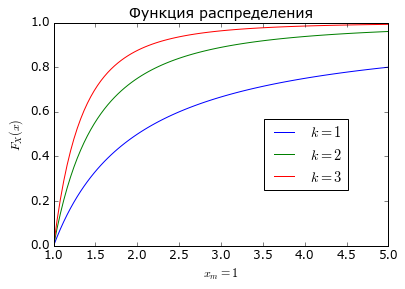

In [39]:
x = np.linspace(1,5,100)
mpl.rc('font', family='Verdana', size =12)
for k in [1, 2, 3]:
    rv = sts.pareto(k)
    cdf = rv.cdf(x)
    plt.plot(x, cdf, label="$k=%d$" % k)
plt.legend(bbox_to_anchor=(0.9, 0.6))
plt.title(u"Функция распределения")
plt.xlabel('$x_m = 1$')
plt.ylabel('$F_X(x)$')

График фукции плотности вероятности при ${x_m} = 1$

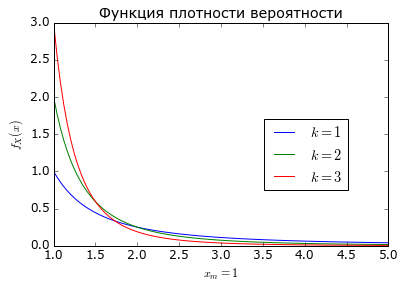

In [38]:
x = np.linspace(1,5,100)
mpl.rc('font', family='Verdana', size =12)
for k in [1, 2, 3]:
    rv = sts.pareto(k)
    cdf = rv.pdf(x)
    plt.plot(x, cdf, label="$k=%d$" % k)
plt.legend(bbox_to_anchor=(0.9, 0.6))
plt.title(u"Функция плотности вероятности")
plt.xlabel('$x_m = 1$')
plt.ylabel('$f_X(x)$')

Заинтересовало это распределение, поскольку Вилфредо Парето изначально использовал его для описания распределения благосостояния, а также распределения дохода. Его правило 20 к 80 (которое гласит: 20% популяции владеет 80 % богатства) однако зависит от конкретной величины ${\textit k,}$ и утверждается, что фактически встречаются существенные количественные отклонения, например, данные самого Парето по Британии в Cours d'économie politique говорят, что там примерно 30 % населения владеет 70 % общего дохода.

Сгенерируем выборку объёма 1000 из распределения Парето с ${\textit k = 3}$:

In [30]:
k = 3.0
x_m = 1.0
pareto_rv = sts.pareto(k)
sample = pareto_rv.rvs(1000)

Строим гистограмму выборки и график теоретической плотности распределения:

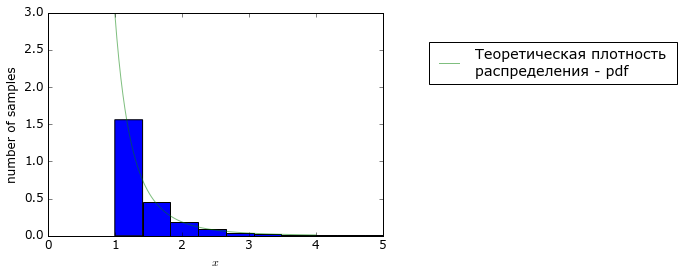

In [31]:
mpl.rc('font', family='Verdana', size =12)

plt.hist(sample, bins=20, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

x = np.linspace(1,4,100)
pdf = pareto_rv.pdf(x)
plt.plot(x, pdf, label=u'Теоретическая плотность \nраспределения - pdf', alpha=0.5)
plt.axis([0., 5., 0., 3.])
plt.legend(bbox_to_anchor=(1.9, 0.9))

Для нескольких значений n (5, 10, 50) сгенерируем 1000 выборок объёма n:

In [162]:
N = 1000
n = 5
data_5 = np.zeros((n, N));
for p in range(n):
    pareto_rv = sts.pareto(k)
    data_5[p] = pareto_rv.rvs(N)

n = 10
data_10 = np.zeros((n, N));
for p in range(n):
    pareto_rv = sts.pareto(k)
    data_10[p] = pareto_rv.rvs(N)

n = 50
data_50 = np.zeros((n, N));
for p in range(n):
    pareto_rv = sts.pareto(k)
    data_50[p] = pareto_rv.rvs(N)

In [163]:
# Транспонируем матрицы выборок для удобства работы:
data_5 = np.transpose(data_5)
data_10 = np.transpose(data_10)
data_50 = np.transpose(data_50)

Посчитаем выборочные средние:

In [165]:
data_5_m = np.zeros((N, 1))
data_10_m = np.zeros((N, 1))
data_50_m = np.zeros((N, 1))

for i in range(N):
    data_5_m[i] = np.mean(data_5[i])
    data_10_m[i] = np.mean(data_10[i])
    data_50_m[i] = np.mean(data_50[i])

Строим гистограммы выборок:

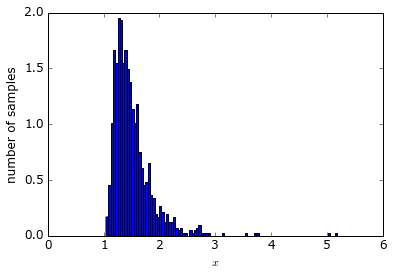

In [176]:
# При n = 5
mpl.rc('font', family='Verdana', size =12)
plt.hist(data_5_m, bins=100, normed=True)
plt.axis([0., 6., 0., 2.0])
plt.ylabel('number of samples')
plt.xlabel('$x$')

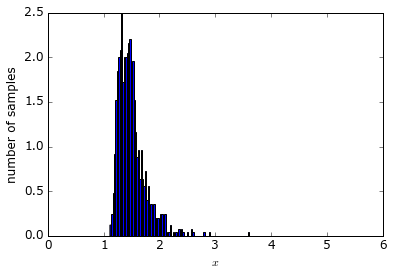

In [177]:
# При n = 10
mpl.rc('font', family='Verdana', size =12)
plt.hist(data_10_m, bins=100, normed=True)
plt.axis([0., 6., 0., 2.5])
plt.ylabel('number of samples')
plt.xlabel('$x$')

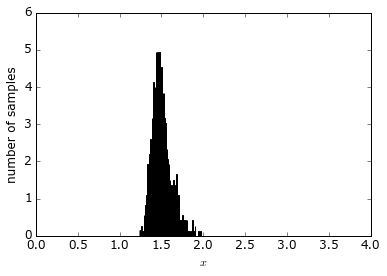

In [180]:
# При n = 50
mpl.rc('font', family='Verdana', size =12)
plt.hist(data_50_m, bins=100, normed=True)
plt.axis([0., 4., 0., 6.0])
plt.ylabel('number of samples')
plt.xlabel('$x$')

Рассчитаем среднее и дисперсию заданного распределения:

Математическое ожидание рассчитывается по формуле:
$$ E[X] = \frac{kx_m}{k-1},  \text {если }\textit{k} > 1 $$

Дисперсия определяется:
$$ D[X] = \left(\frac{x_m}{k-1}\right)^2 \left(\frac{k}{k-2}\right), \text {при }\textit{k} > 2 $$

In [45]:
EX = k*x_m/(k-1)
DX = ((x_m)/(k-1))**2*(k/(k-2))
print 'EX = ' + str(EX) + '\t' + 'DX = ' + str(DX)

EX = 1.5	DX = 0.75


Определим параметры нормального распределения и построим график плотности распределения:

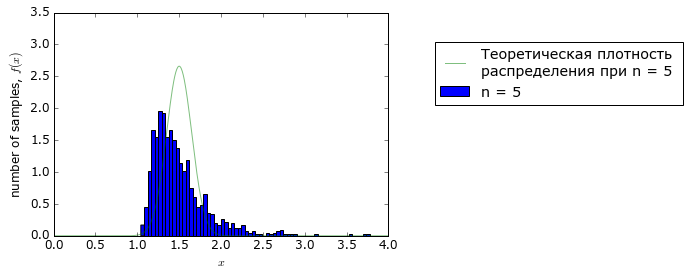

In [225]:
#Строим гистограмму выборки:
n = 5
mpl.rc('font', family='Verdana', size =12)
plt.hist(data_5_m, bins=100, normed=True, label='n = %s' %n)
plt.ylabel('number of samples, $f(x)$')
plt.xlabel('$x$')
plt.axis([0., 4., 0., 3.5])

norm_rv_5 = sts.norm(EX, (DX/n))

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(0,6,1000)
pdf = norm_rv_5.pdf(x)
plt.plot(x, pdf, label=u'Теоретическая плотность \nраспределения при n = 5', alpha=0.5)
plt.legend(bbox_to_anchor=(1.9, 0.9))

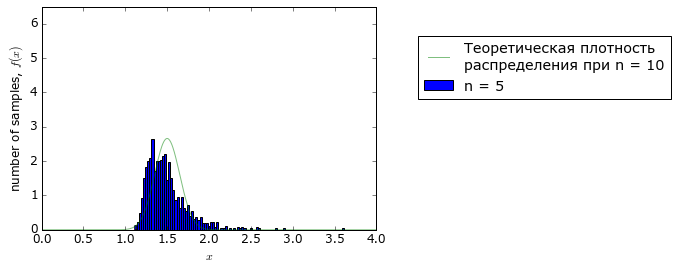

In [227]:
#Строим гистограмму выборки:
n = 5
mpl.rc('font', family='Verdana', size =12)
plt.hist(data_10_m, bins=100, normed=True, label='n = %s' %n)
plt.ylabel('number of samples, $f(x)$')
plt.xlabel('$x$')
plt.axis([0., 4., 0., 6.5])

norm_rv_10 = sts.norm(EX, (DX/n))

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(0,6,1000)
pdf = norm_rv_10.pdf(x)
plt.plot(x, pdf, label=u'Теоретическая плотность \nраспределения при n = 10', alpha=0.5)
plt.legend(bbox_to_anchor=(1.9, 0.9))

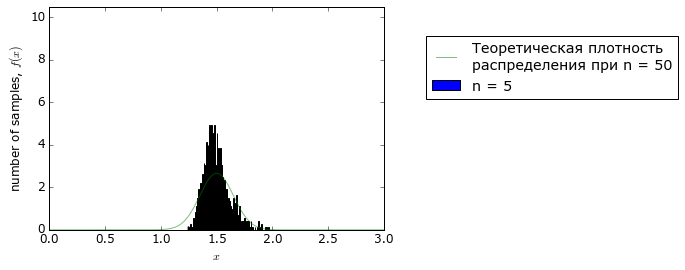

In [231]:
#Строим гистограмму выборки:
n = 5
mpl.rc('font', family='Verdana', size =12)
plt.hist(data_50_m, bins=100, normed=True, label='n = %s' %n)
plt.ylabel('number of samples, $f(x)$')
plt.xlabel('$x$')
plt.axis([0., 3., 0., 10.5])

norm_rv_50 = sts.norm(EX, (DX/(n)))

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(0,6,1000)
pdf = norm_rv_50.pdf(x)
plt.plot(x, pdf, label=u'Теоретическая плотность \nраспределения при n = 50', alpha=0.5)
plt.legend(bbox_to_anchor=(1.9, 0.9))

### Выводы:

Распределение выборочных средних сходится к нормальному с ростом n, но в силу большой степени скошенности исходного распределения, происходит это не быстро. По полученным результатам можно заметить, что с увеличением n точность нормальной аппроксимации увеличивается.